paddleocr Document: https://paddlepaddle.github.io/PaddleOCR/latest/en/index.html

In [1]:
import pandas as pd
from PIL import Image
from paddleocr import PaddleOCR

In [2]:
!ls ../tmp/DAI_document_classification_TEST

data.csv images


In [3]:
df = pd.read_csv('../tmp/DAI_document_classification_TEST/data.csv')
print(df.shape)
df.head()

(30, 2)


,image,class
0,images/doc_000832.png,scientific_publication
1,images/doc_000076.png,email
2,images/doc_000584.png,scientific_publication
3,images/doc_000101.png,resume
4,images/doc_000279.png,email


In [4]:
img_dir = '../tmp/DAI_document_classification_TEST/'

In [5]:
img_dir + df['image'][0]

'../tmp/DAI_document_classification_TEST/images/doc_000832.png'

In [6]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2024/11/30 09:35:13] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/Users/YShimada-MBP16/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/YShimada-MBP16/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=

In [7]:
type(ocr)

paddleocr.paddleocr.PaddleOCR

../tmp/DAI_document_classification_TEST/images/doc_000248.png


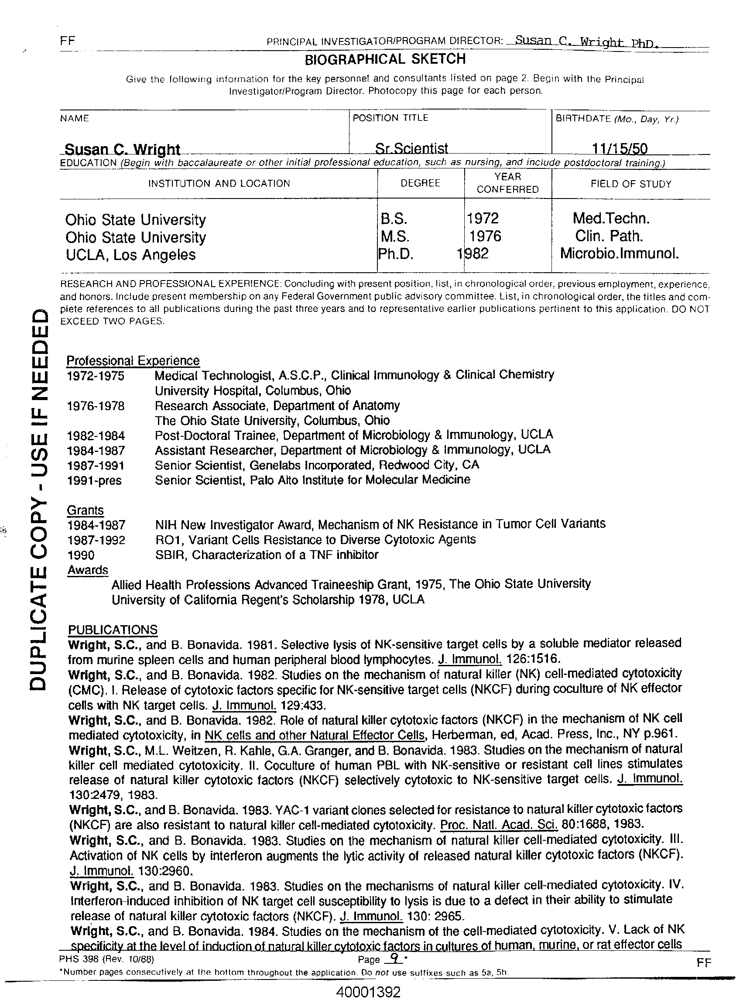

In [8]:
img_path = img_dir + df['image'][5]
print(img_path)

im = Image.open(img_path)
im

In [9]:
%%time
result = ocr.ocr(img_path, cls=True)   # Detection + Classification + Recognition

[2024/11/30 09:35:33] ppocr DEBUG: dt_boxes num : 92, elapsed : 0.7262740135192871
[2024/11/30 09:35:34] ppocr DEBUG: cls num  : 92, elapsed : 0.6466636657714844
[2024/11/30 09:35:57] ppocr DEBUG: rec_res num  : 92, elapsed : 22.833664894104004
CPU times: user 23.6 s, sys: 562 ms, total: 24.2 s
Wall time: 24.3 s


In [10]:
#result

In [11]:
len(result), len(result[0])

(1, 89)

In [12]:
result[0][1]

[[[303.0, 52.0], [466.0, 51.0], [466.0, 66.0], [303.0, 67.0]],
 ('BIOGRAPHICAL SKETCH', 0.9733049273490906)]

In [20]:
result[0][1][1][0] 

'BIOGRAPHICAL SKETCH'

In [13]:
result[0][88]

[[[335.0, 982.0], [403.0, 982.0], [403.0, 999.0], [335.0, 999.0]],
 ('40001392', 0.9988994598388672)]

In [26]:
script = []
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        #print(line[1][0])
        script.append(line[1][0])

In [27]:
script

['FF',
 'BIOGRAPHICAL SKETCH',
 'Give the following information for the key personnel and consultants listed on page 2. Begin with the Principal',
 'Investigator/Program Director. Photocopy this page for each person.',
 'NAME',
 'POSITION TITLE',
 'BIRTHDATE (Mo.DayYr.)',
 'Susan C.Wright',
 'Sr.Scientist',
 '11/15/50',
 'EDUCATiON (Begin with baccalaureate or other initial professional education, such: as nursing, and inciude postdoctoral training.)',
 'INSTITUTION AND LOCATION',
 'DEGREE',
 'YEAR',
 'CONFERRED',
 'FIELD OF STUDY',
 'Ohio State University',
 'B.S.',
 '1972',
 'Med.Techn.',
 'Ohio State University',
 'M.S.',
 '1976',
 'Clin.Path.',
 'UCLA,Los Angeles',
 'Ph.D.',
 '1982',
 'Microbio.Immunol.',
 'RESEARCH AND PROFESSIONAL EXPERtENCE: Concluding with present position, list, in chronological order, previous employment, experience,',
 'and honors. Include present membership on any Federal Government public advisory committee. List, in chronological order, the titles and com

In [ ]:
'''
all_scripts = {}
for doc_list:
    script = []
    for idx:
        for line:
            script.append()
    all_scripts[doc] = script
'''